# **Euro Satelit Image Classification**

In [1]:
! pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [4]:
! kaggle datasets download -d apollo2506/eurosat-dataset

100% 2.04G/2.04G [00:21<00:00, 148MB/s]
100% 2.04G/2.04G [00:21<00:00, 102MB/s]


In [5]:
import zipfile, os
local_zip = 'eurosat-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
os.listdir('/content/EuroSAT')

['PermanentCrop',
 'Industrial',
 'River',
 'Residential',
 'SeaLake',
 'HerbaceousVegetation',
 'Forest',
 'Highway',
 'train.csv',
 'validation.csv',
 'test.csv',
 'Pasture',
 'AnnualCrop',
 'label_map.json']

In [7]:
os.remove('/content/EuroSAT/train.csv')
os.remove('/content/EuroSAT/test.csv')
os.remove('/content/EuroSAT/validation.csv')
os.remove('/content/EuroSAT/label_map.json')
os.listdir('/content/EuroSAT')

['PermanentCrop',
 'Industrial',
 'River',
 'Residential',
 'SeaLake',
 'HerbaceousVegetation',
 'Forest',
 'Highway',
 'Pasture',
 'AnnualCrop']

In [8]:
for i in range(0, len(os.listdir('/content/EuroSAT'))):
  label = os.listdir('/content/EuroSAT')[i]
  print(f"{label} = {len(os.listdir(f'/content/EuroSAT/{label}'))}")

PermanentCrop = 2500
Industrial = 2500
River = 2500
Residential = 3000
SeaLake = 3000
HerbaceousVegetation = 3000
Forest = 3000
Highway = 2500
Pasture = 2000
AnnualCrop = 3000


In [9]:
os.listdir('/content/EuroSAT/AnnualCrop')

['AnnualCrop_662.jpg',
 'AnnualCrop_785.jpg',
 'AnnualCrop_880.jpg',
 'AnnualCrop_2383.jpg',
 'AnnualCrop_632.jpg',
 'AnnualCrop_2549.jpg',
 'AnnualCrop_758.jpg',
 'AnnualCrop_1861.jpg',
 'AnnualCrop_2512.jpg',
 'AnnualCrop_1799.jpg',
 'AnnualCrop_520.jpg',
 'AnnualCrop_1213.jpg',
 'AnnualCrop_181.jpg',
 'AnnualCrop_1807.jpg',
 'AnnualCrop_510.jpg',
 'AnnualCrop_1412.jpg',
 'AnnualCrop_377.jpg',
 'AnnualCrop_1345.jpg',
 'AnnualCrop_1432.jpg',
 'AnnualCrop_1129.jpg',
 'AnnualCrop_2216.jpg',
 'AnnualCrop_2032.jpg',
 'AnnualCrop_258.jpg',
 'AnnualCrop_300.jpg',
 'AnnualCrop_1150.jpg',
 'AnnualCrop_147.jpg',
 'AnnualCrop_2738.jpg',
 'AnnualCrop_2011.jpg',
 'AnnualCrop_2594.jpg',
 'AnnualCrop_1258.jpg',
 'AnnualCrop_1112.jpg',
 'AnnualCrop_2678.jpg',
 'AnnualCrop_2785.jpg',
 'AnnualCrop_1487.jpg',
 'AnnualCrop_2285.jpg',
 'AnnualCrop_1280.jpg',
 'AnnualCrop_1794.jpg',
 'AnnualCrop_2161.jpg',
 'AnnualCrop_973.jpg',
 'AnnualCrop_2201.jpg',
 'AnnualCrop_1.jpg',
 'AnnualCrop_1843.jpg',
 'Annual

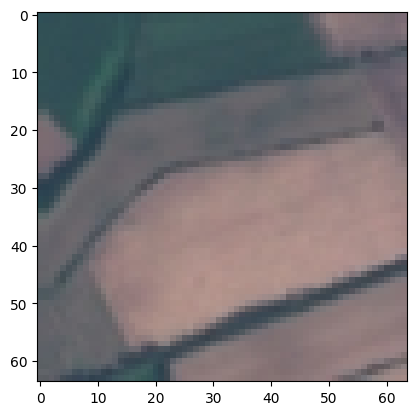

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/EuroSAT/AnnualCrop/AnnualCrop_418.jpg')
imgplot = plt.imshow(img)

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/EuroSAT/'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.2,
    brightness_range = (0.5, 1.5),
    zoom_range=0.2,
    validation_split=0.2
    )

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
    )

In [12]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
val_generator = val_datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [58]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [59]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_50 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_51 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 8, 8, 64)         

In [72]:
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

class MyCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.94) and (logs.get('accuracy')>0.94):
      self.model.stop_training = True
model_cp = ModelCheckpoint(
    filepath="/tmp/best-weights/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5",
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    mode="max"
)
callback = MyCallback()
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20)

In [73]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [77]:
history = model.fit(
    train_generator,
    steps_per_epoch=128,
    epochs=100,
    validation_data=val_generator,
    validation_steps=100,
    verbose=1,
    callbacks=[callback, model_cp, early_stopping]
)

Epoch 1/100
128/128 [==============================] - ETA: 0s - loss: 0.2570 - accuracy: 0.9087
Epoch 1: val_accuracy did not improve from 0.92167
128/128 [==============================] - 12s 94ms/step - loss: 0.2570 - accuracy: 0.9087 - val_loss: 0.3293 - val_accuracy: 0.8925
Epoch 2/100
128/128 [==============================] - ETA: 0s - loss: 0.2544 - accuracy: 0.9099
Epoch 2: val_accuracy did not improve from 0.92167
128/128 [==============================] - 10s 75ms/step - loss: 0.2544 - accuracy: 0.9099 - val_loss: 0.3602 - val_accuracy: 0.8856
Epoch 3/100
128/128 [==============================] - ETA: 0s - loss: 0.2721 - accuracy: 0.9077
Epoch 3: val_accuracy did not improve from 0.92167
128/128 [==============================] - 11s 88ms/step - loss: 0.2721 - accuracy: 0.9077 - val_loss: 0.4354 - val_accuracy: 0.8662
Epoch 4/100
128/128 [==============================] - ETA: 0s - loss: 0.2993 - accuracy: 0.8928
Epoch 4: val_accuracy did not improve from 0.92167
128/128 [

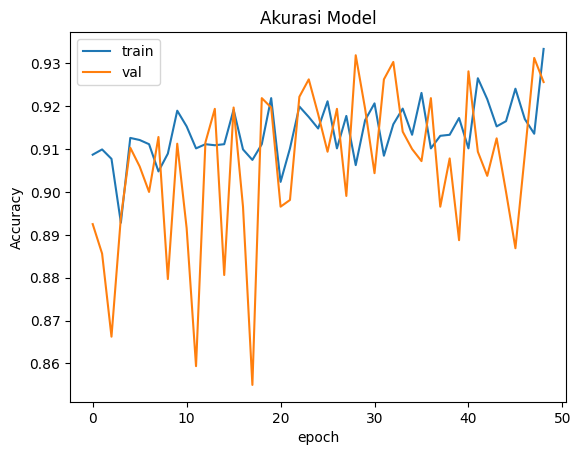

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

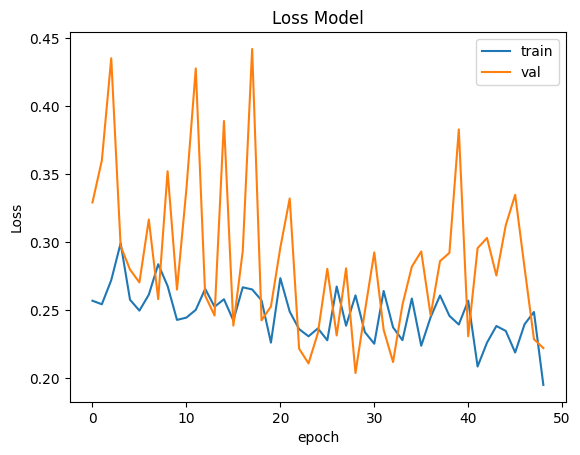

In [79]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [82]:
val_loss_acc = model.evaluate(val_generator, steps=len(val_generator))

169/169 [==============================] - 4s 22ms/step - loss: 0.2204 - accuracy: 0.9276


### **Export TF Lite**

In [88]:
import pathlib
# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('euro.tflite')
tflite_model_file.write_bytes(tflite_model)

694076

In [90]:
tflite_model_size = len(tflite_model) / (1024 * 1024)
print(f'TFLite model size = {tflite_model_size} MBs.')

TFLite model size = 0.6619224548339844 MBs.
